In [1]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Due the different version of python can be found and each machine 
#or libriries just using this library to avoid distraction and anoing warnigs
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Import data
df = pd.read_csv("PEA15.csv")

#df = sns.load_dataset("PEA15.csv").rename(columns={"Component": "Indicator"})
df

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,2014,Annual births,Thousand,68.4
1,Annual Population Change,2014,Annual deaths,Thousand,29.2
2,Annual Population Change,2014,Natural increase,Thousand,39.2
3,Annual Population Change,2014,Immigrants,Thousand,66.5
4,Annual Population Change,2014,Emigrants,Thousand,75.0
...,...,...,...,...,...
75,Annual Population Change,2023,Immigrants,Thousand,141.6
76,Annual Population Change,2023,Emigrants,Thousand,64.0
77,Annual Population Change,2023,Net migration,Thousand,77.6
78,Annual Population Change,2023,Population change,Thousand,97.6


# Making sure that my data set is ready to - EDA
    - df.head( )
    - df.info( )
    - df.describe( )
    - df.shape
    - df.dtypes

In [ ]:
df.head(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
df.count()

In [27]:
#Verifing if I have any data duplicated (inconsitent)
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


In [28]:
#Cleaning my dataset - I won"t need these 2 columns
to_drop = ["STATISTIC Label",
            "UNIT"]
df.drop(to_drop, inplace=True, axis=1)

In [29]:
#Converting the numbers to be better in the visualisation
df ["real_number"] = df ["VALUE"]* 1000

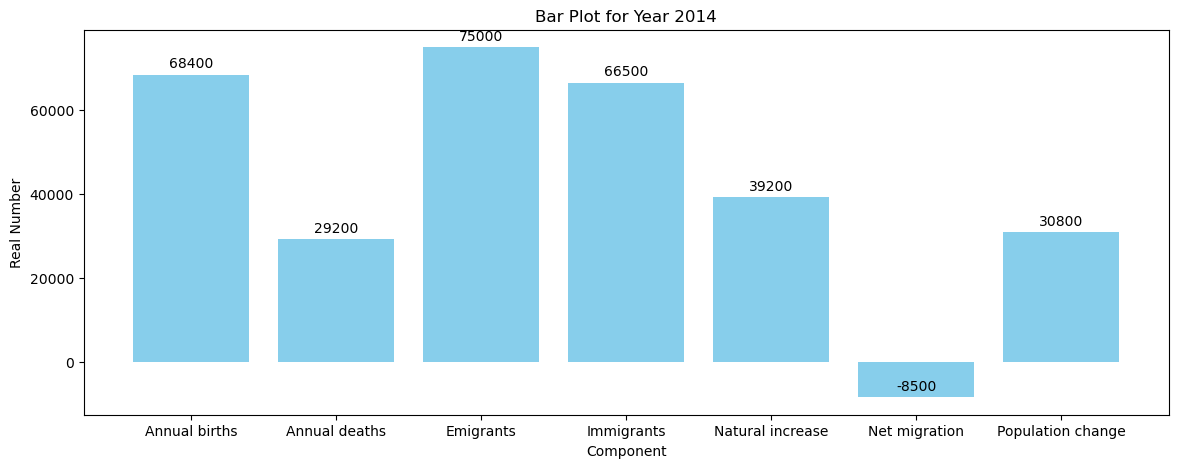

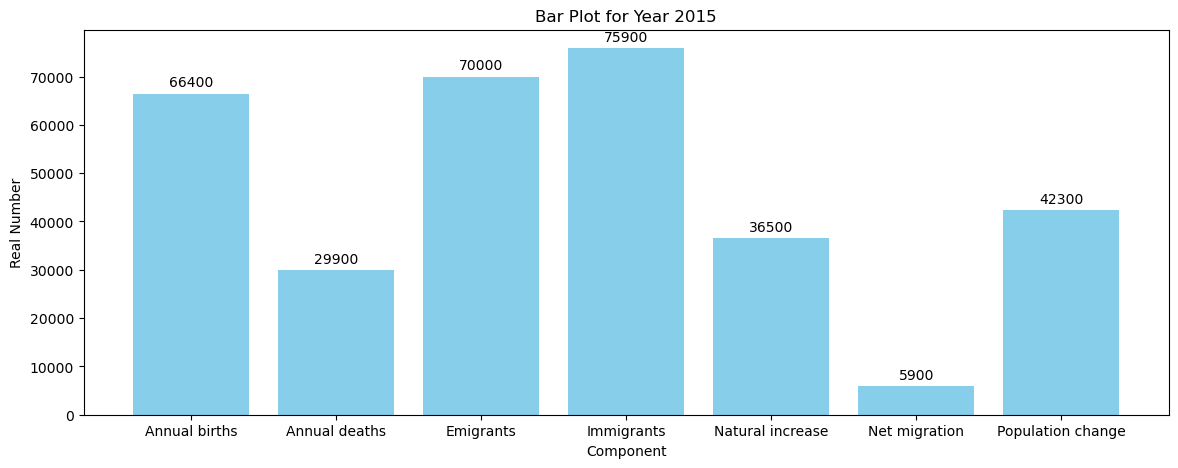

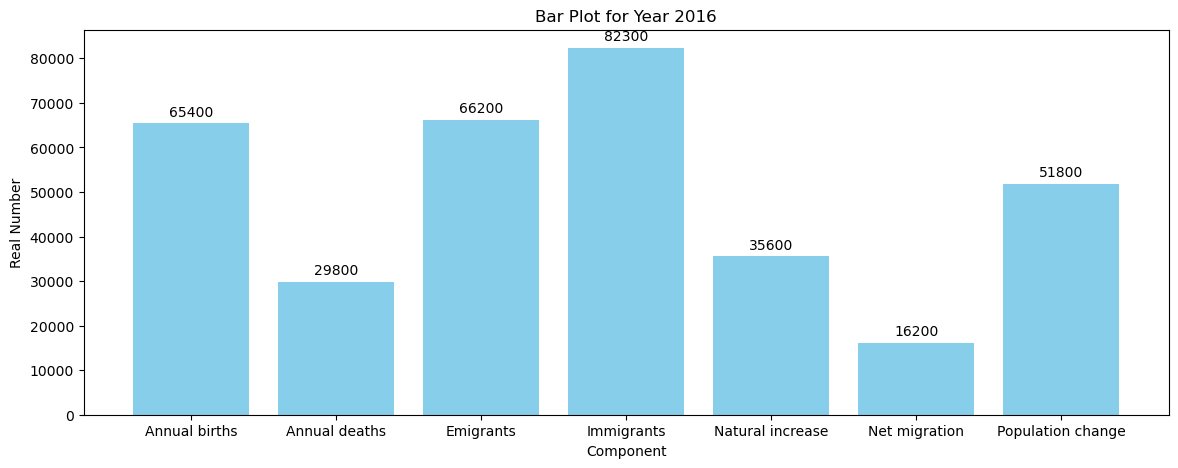

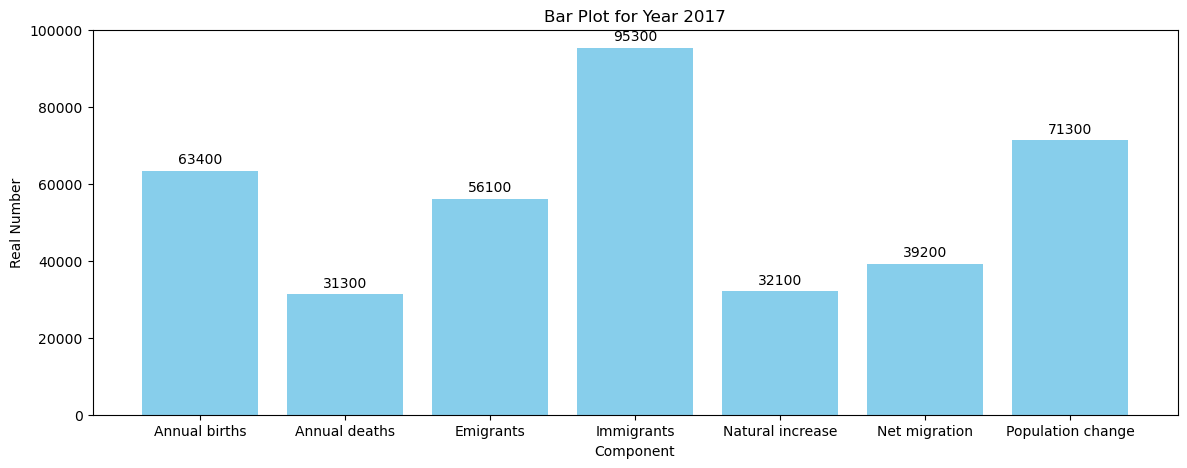

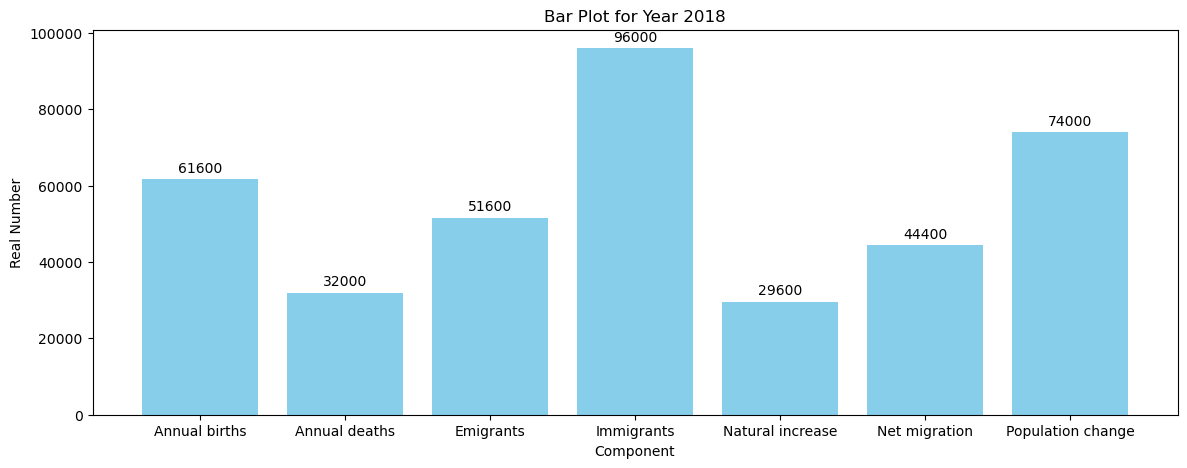

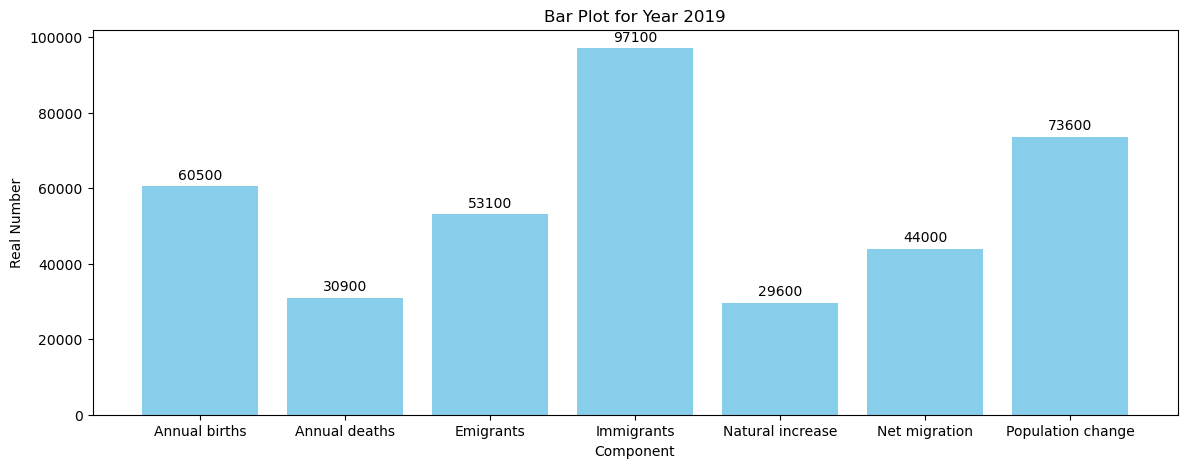

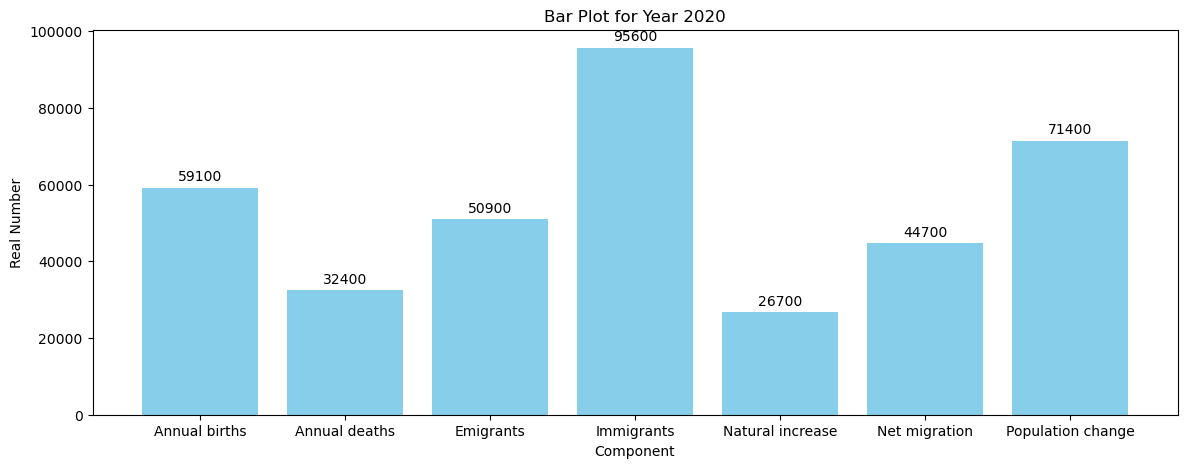

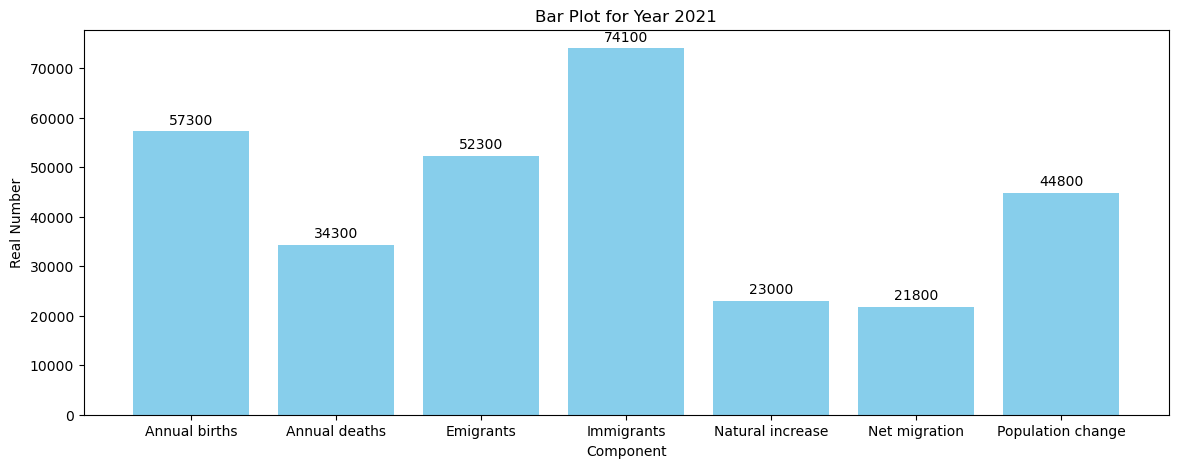

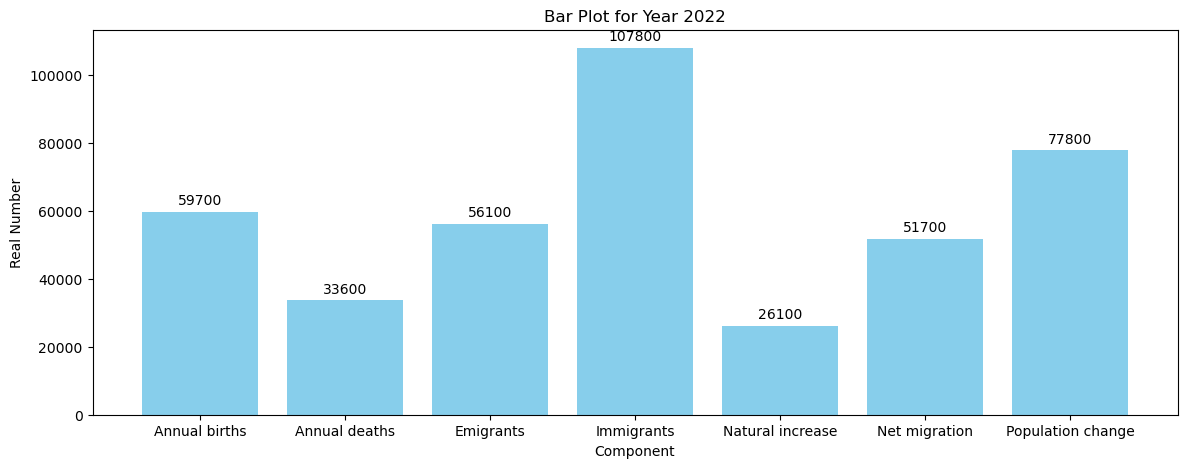

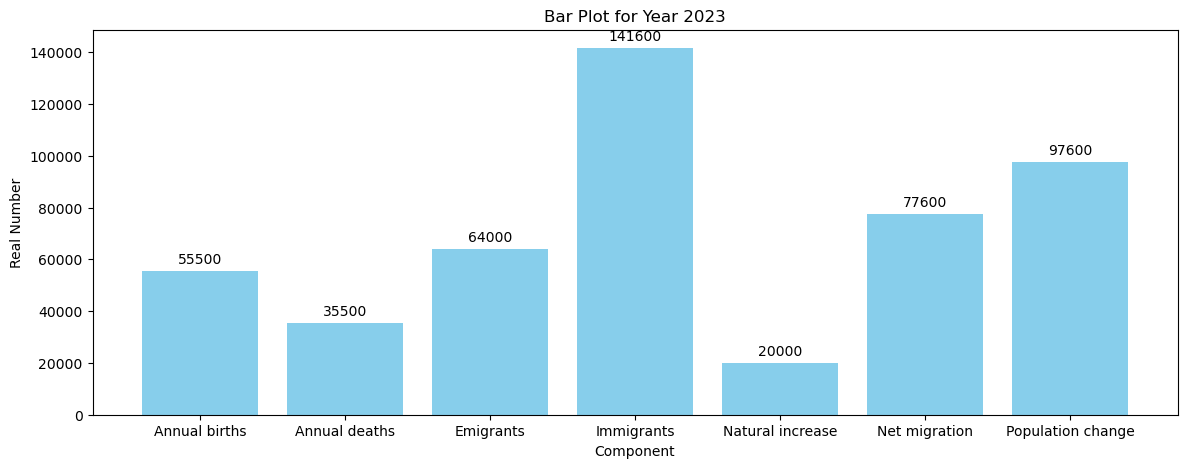

In [30]:
# Getting unique years in the DataFrame
years = df['Year'].unique()

# Create a separate bar plot for each year
for year in years:
    year_data = df[df['Year'] == year]

# Filter out the 'population' row for the current year
    year_data = year_data[year_data['Component'] != 'Population']

# Group the data by "Component" and calculate the sum of "VALUE"
    grouped = year_data.groupby('Component')['real_number'].sum()

# Create a bar plot for the current year
    plt.figure(figsize=(14, 5))
    bars = plt.bar(grouped.index, grouped.values, color='skyblue')
    plt.title(f'Bar Plot for Year {year}')
    plt.xlabel('Component')
    plt.ylabel('Real Number')
    
# Annotate each bar with its value
    for bar in bars:
        height = int (bar.get_height()) # Convert height to an integer better vizualization
        plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                     textcoords='offset points', ha='center', va='bottom')

# Show each plot
    plt.show()